In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def cv_show(img, name):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
def img_resize(img, hight):
    (h, w) = img.shape[0], img.shape[1]
    r = h / hight
    width = w / r
    img = cv2.resize(img, (int(width), int(hight)))    
    return img

In [4]:
img = cv2.imread("./template/ocr_a_reference.png")
cv_show(img, 'img')

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv_show(gray, "g")

In [6]:
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
cv_show(thresh, 't')

In [7]:
cy = cv2.Canny(thresh, 127, 255)
cv_show(cy, 'cy')

In [8]:
contours, hierarchy = cv2.findContours(cy, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [9]:
len(contours)

10

In [10]:
thresh.shape

(126, 800)

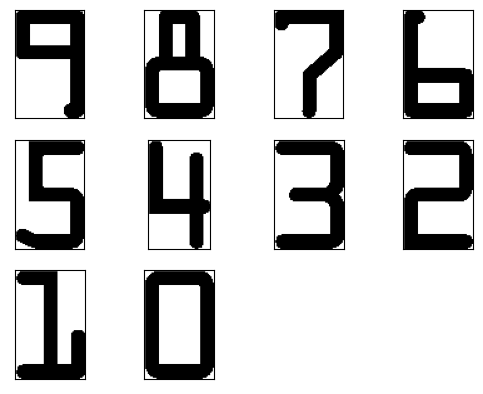

In [11]:
for i in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[i])
    plt.subplot(3, 4, i+1)
    plt.imshow(thresh[y:y+h, x:x+w],cmap = plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [12]:
import os

for i in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[i])
    cv2.imwrite(os.path.join('cuted_template', str(9-i)+'.jpg'), thresh[y:y+h, x:x+w])

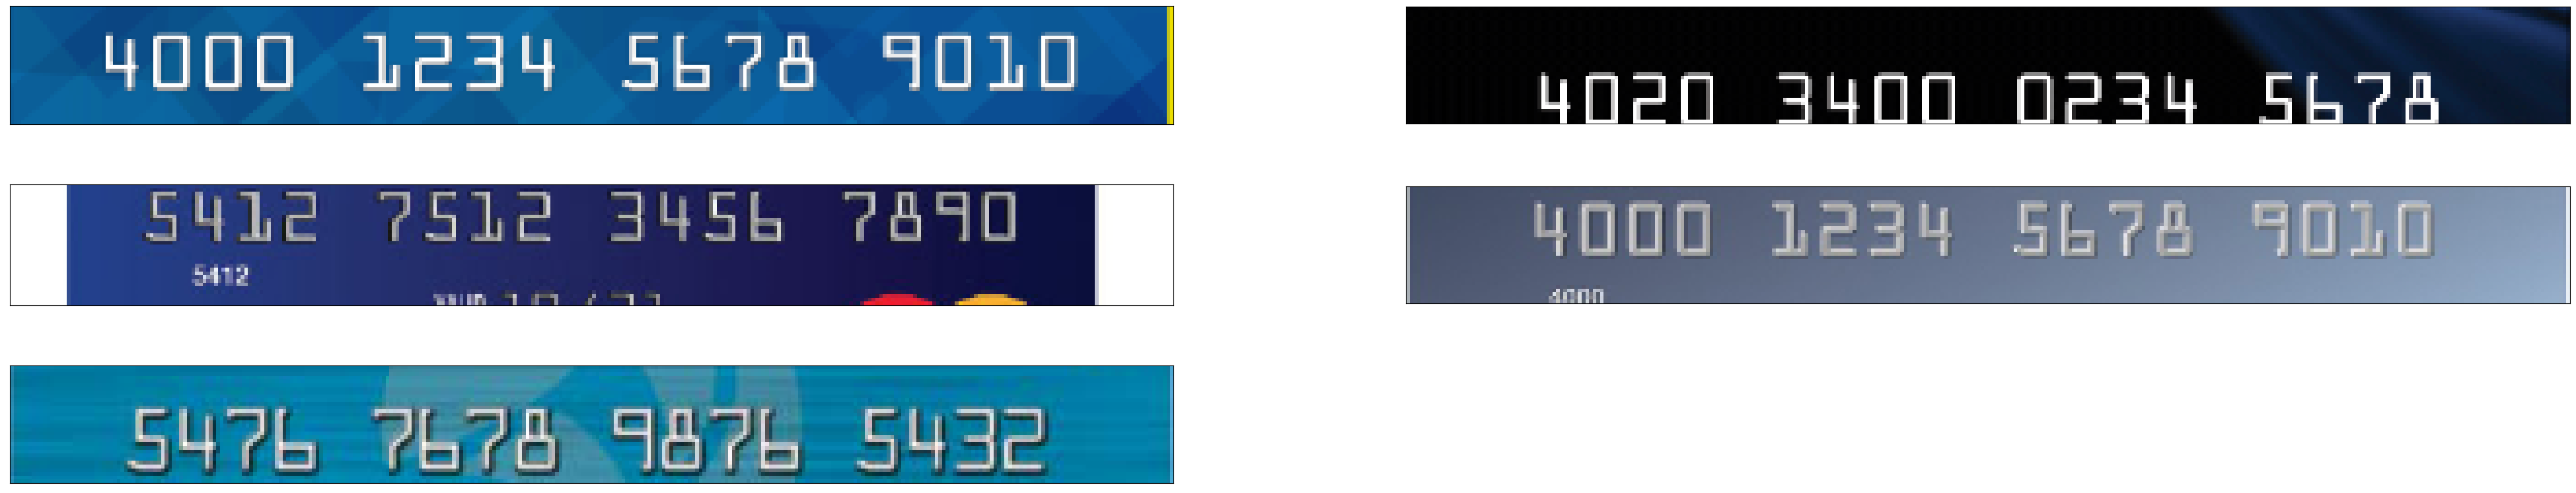

In [13]:
i = 1
plt.figure(figsize=(50, 10))
for name in os.listdir('./images'):
    img = cv2.imread(os.path.join('./images',name))
    img = img_resize(img, 200)
    h = img.shape[0]
    img = img[h//2:h//3 * 2]
    plt.subplot(3, 2, i)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    i+=1
        
plt.show()

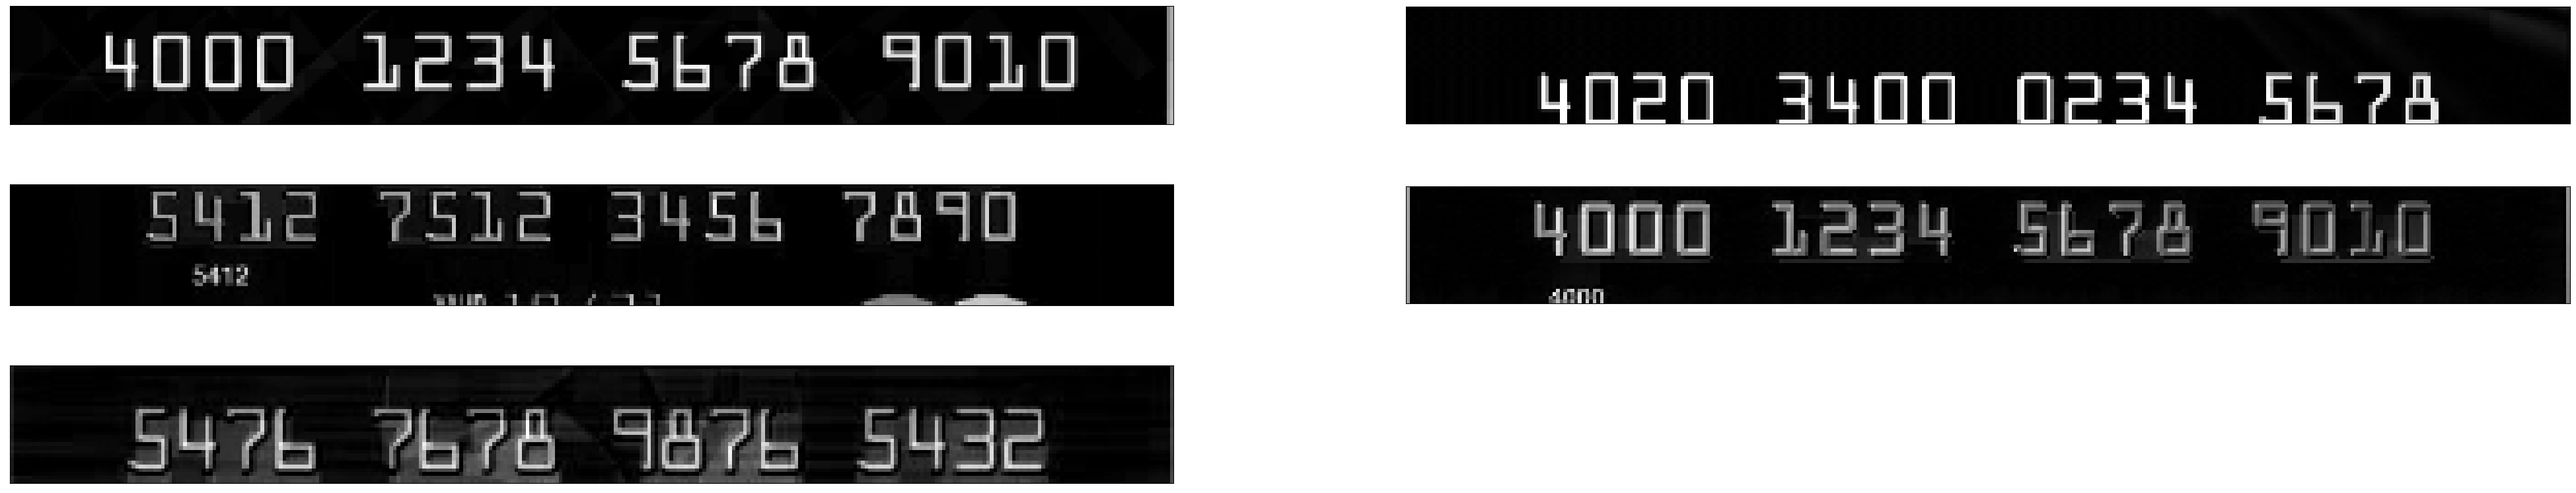

In [14]:
i = 1
plt.figure(figsize=(50, 10))
for name in os.listdir('./images'):
    img = cv2.imread(os.path.join('./images',name), cv2.IMREAD_GRAYSCALE)
    img = img_resize(img, 200)
    h = img.shape[0]
    img = img[h//2:h//3*2]
    rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 10))
    tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, rectKernel) 

    plt.subplot(3, 2, i)
    plt.imshow(tophat, cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    i+=1
        
plt.show()

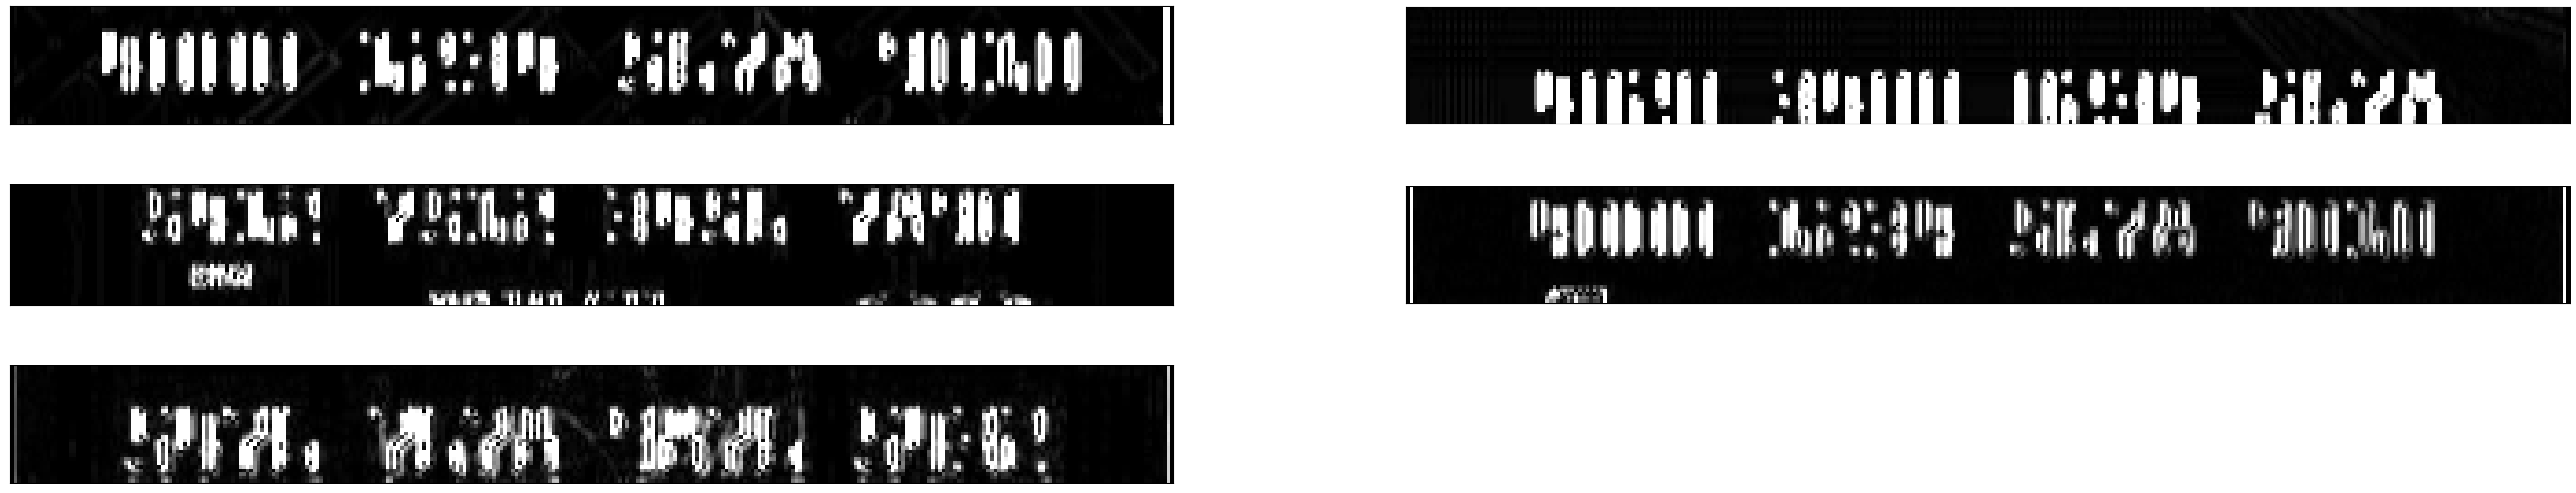

In [15]:
i = 1
plt.figure(figsize=(50, 10))
for name in os.listdir('./images'):
    img = cv2.imread(os.path.join('./images',name), cv2.IMREAD_GRAYSCALE)
    img = img_resize(img, 200)
    h = img.shape[0]
    img = img[h//2:h//3*2]
    rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 5))
    tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, rectKernel) 
    sobelx = cv2.Sobel(tophat, cv2.CV_64F, 1, 0, ksize=3)
    sobelx = cv2.convertScaleAbs(sobelx)
    plt.subplot(3, 2, i)
    plt.imshow(sobelx, cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    i+=1
        
plt.show()

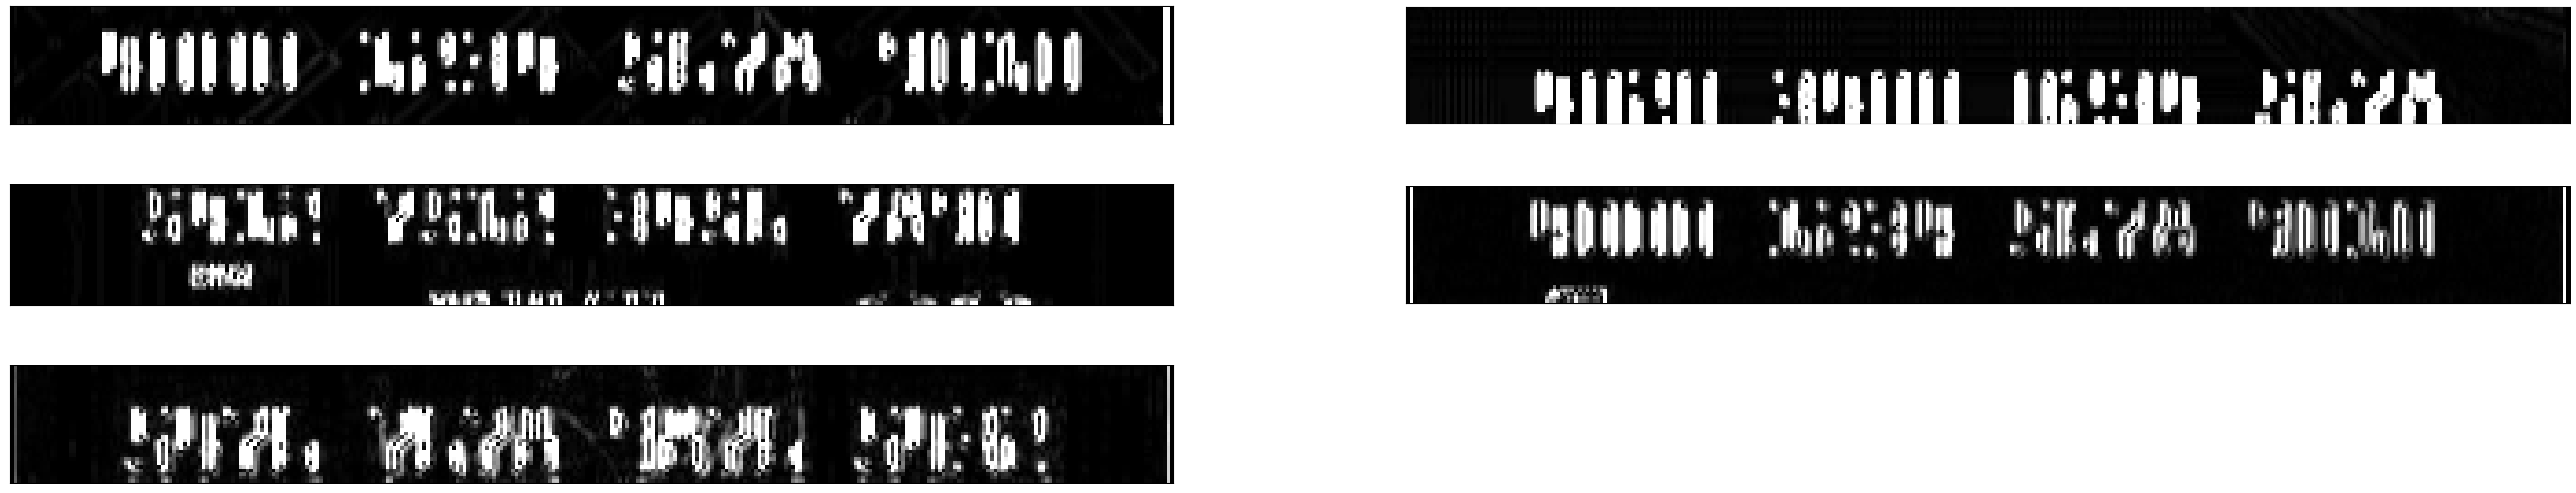

In [16]:
i = 1
plt.figure(figsize=(50, 10))
for name in os.listdir('./images'):
    img = cv2.imread(os.path.join('./images',name), cv2.IMREAD_GRAYSCALE)
    img = img_resize(img, 200)
    h = img.shape[0]
    img = img[h//2:h//3*2]
    rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 5))
    tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, rectKernel) 
    sobelx = cv2.Sobel(tophat, cv2.CV_64F, 1, 0, ksize=3)
    sobelx = cv2.convertScaleAbs(sobelx)
    minval, maxval = np.min(sobelx), np.max(sobelx)
    sobelx = (255 * ((sobelx - minval) / (maxval - minval)))
    sobelx = sobelx.astype('uint8')
    plt.subplot(3, 2, i)
    plt.imshow(sobelx, cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    i+=1
        
plt.show()

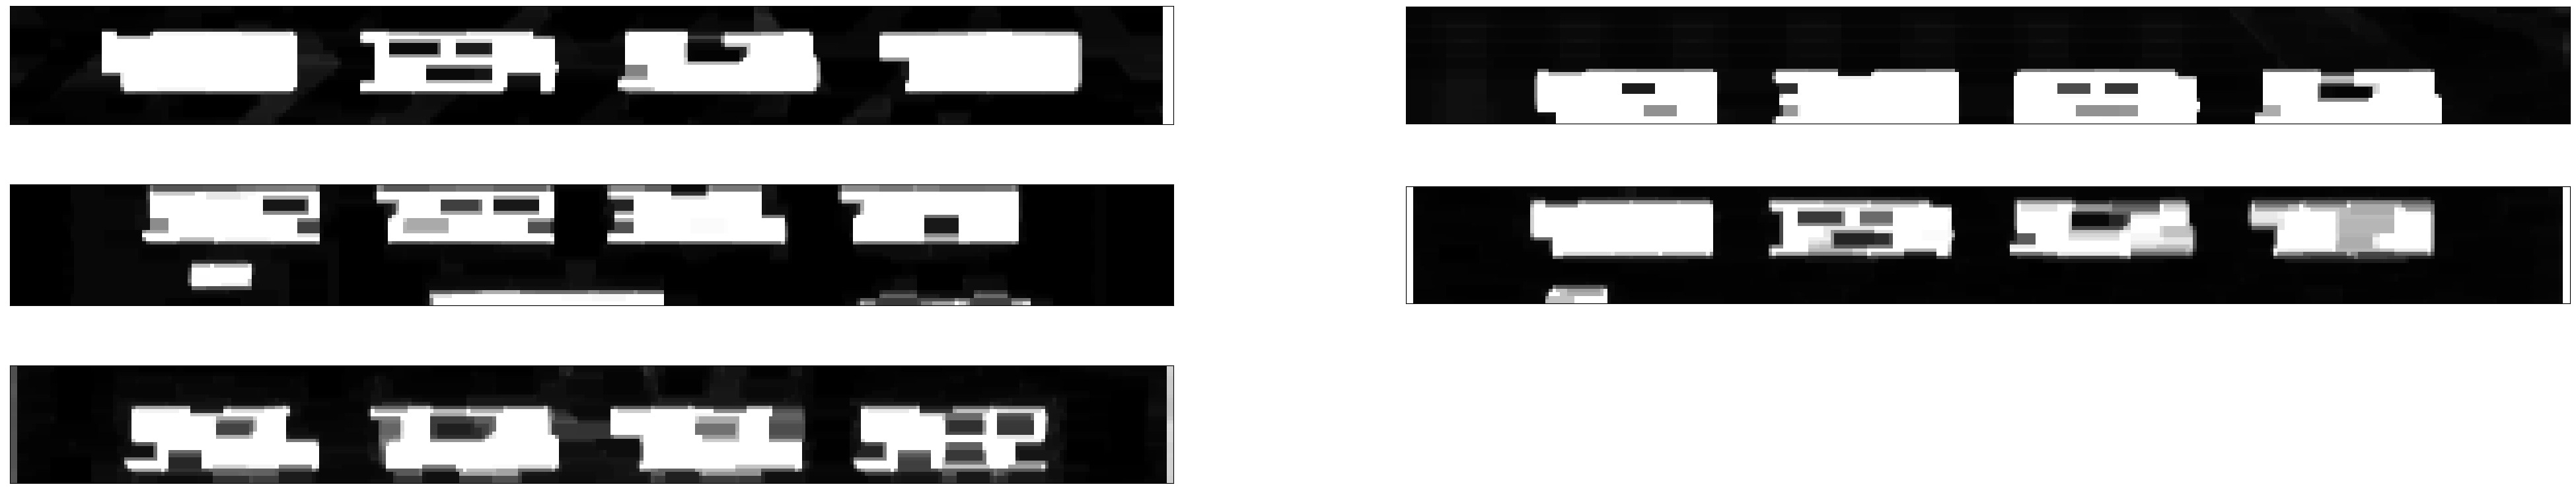

In [17]:
i = 1
plt.figure(figsize=(50, 10))
for name in os.listdir('./images'):
    img = cv2.imread(os.path.join('./images',name), cv2.IMREAD_GRAYSCALE)
    img = img_resize(img, 200)
    h = img.shape[0]
    img = img[h//2:h//3*2]
    rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))
    tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, rectKernel) 
    sobelx = cv2.Sobel(tophat, cv2.CV_64F, 1, 0, ksize=3)
    sobelx = cv2.convertScaleAbs(sobelx)
    minval, maxval = np.min(sobelx), np.max(sobelx)
    sobelx = (255 * ((sobelx - minval) / (maxval - minval)))
    sobelx = sobelx.astype('uint8')
    dilate = cv2.dilate(sobelx, rectKernel, 10)
    erosion = cv2.erode(dilate, rectKernel, 10)
    plt.subplot(3, 2, i)
    plt.imshow(erosion, cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    i+=1
        
plt.show()

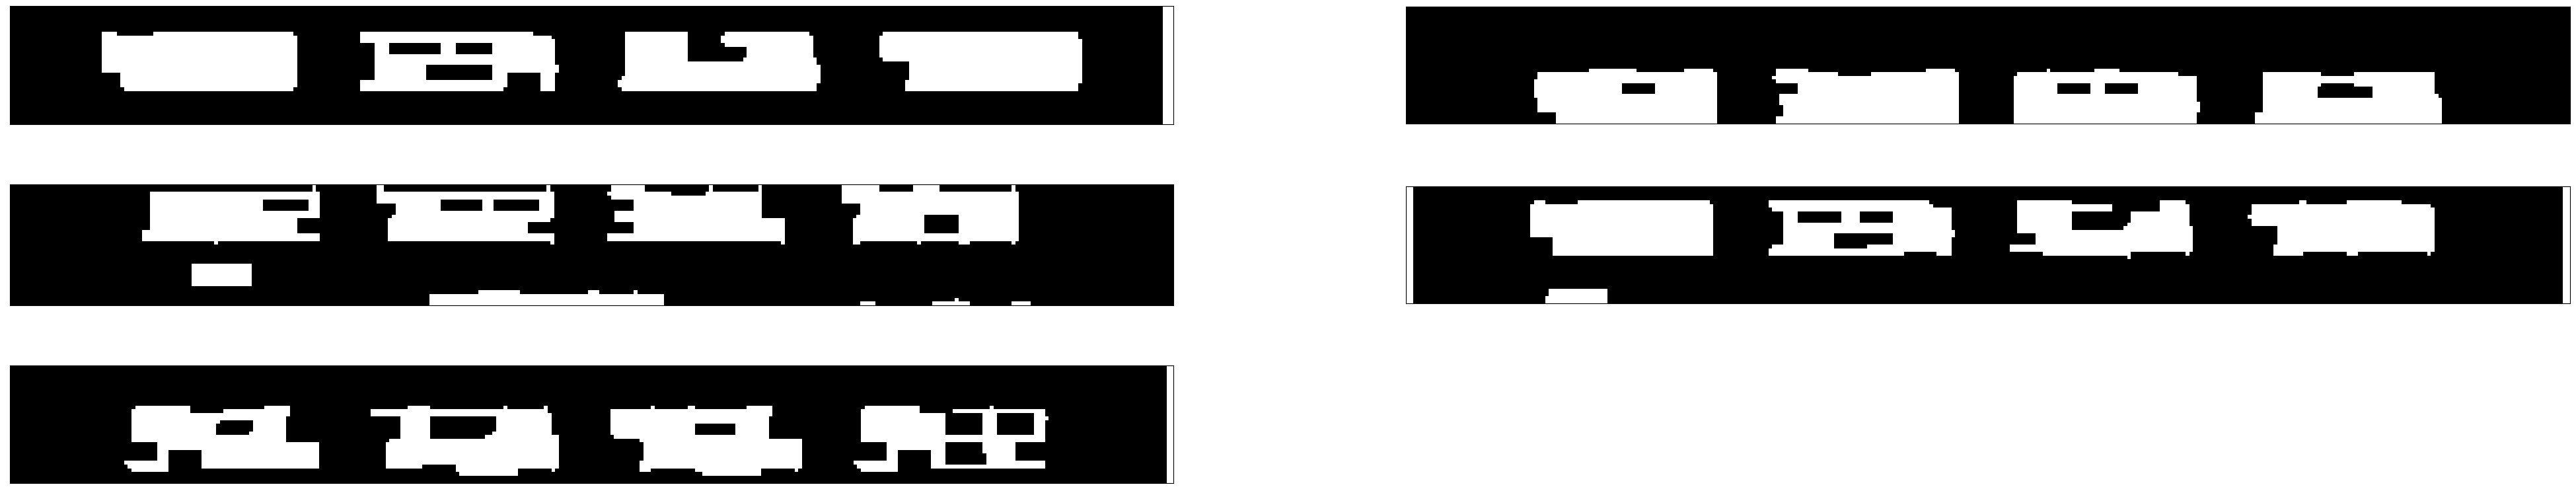

In [18]:
i = 1
plt.figure(figsize=(50, 10))
for name in os.listdir('./images'):
    img = cv2.imread(os.path.join('./images',name), cv2.IMREAD_GRAYSCALE)
    img = img_resize(img, 200)
    h = img.shape[0]
    img = img[h//2:h//3*2]
    rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))
    tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, rectKernel) 
    sobelx = cv2.Sobel(tophat, cv2.CV_64F, 1, 0, ksize=3)
    sobelx = cv2.convertScaleAbs(sobelx)
    minval, maxval = np.min(sobelx), np.max(sobelx)
    sobelx = (255 * ((sobelx - minval) / (maxval - minval)))
    sobelx = sobelx.astype('uint8')
    dilate = cv2.dilate(sobelx, rectKernel, 10)
    erosion = cv2.erode(dilate, rectKernel, 10)
    
    ret, thresh = cv2.threshold(erosion, 0, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
    plt.subplot(3, 2, i)
    plt.imshow(thresh, cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    i+=1
        
plt.show()

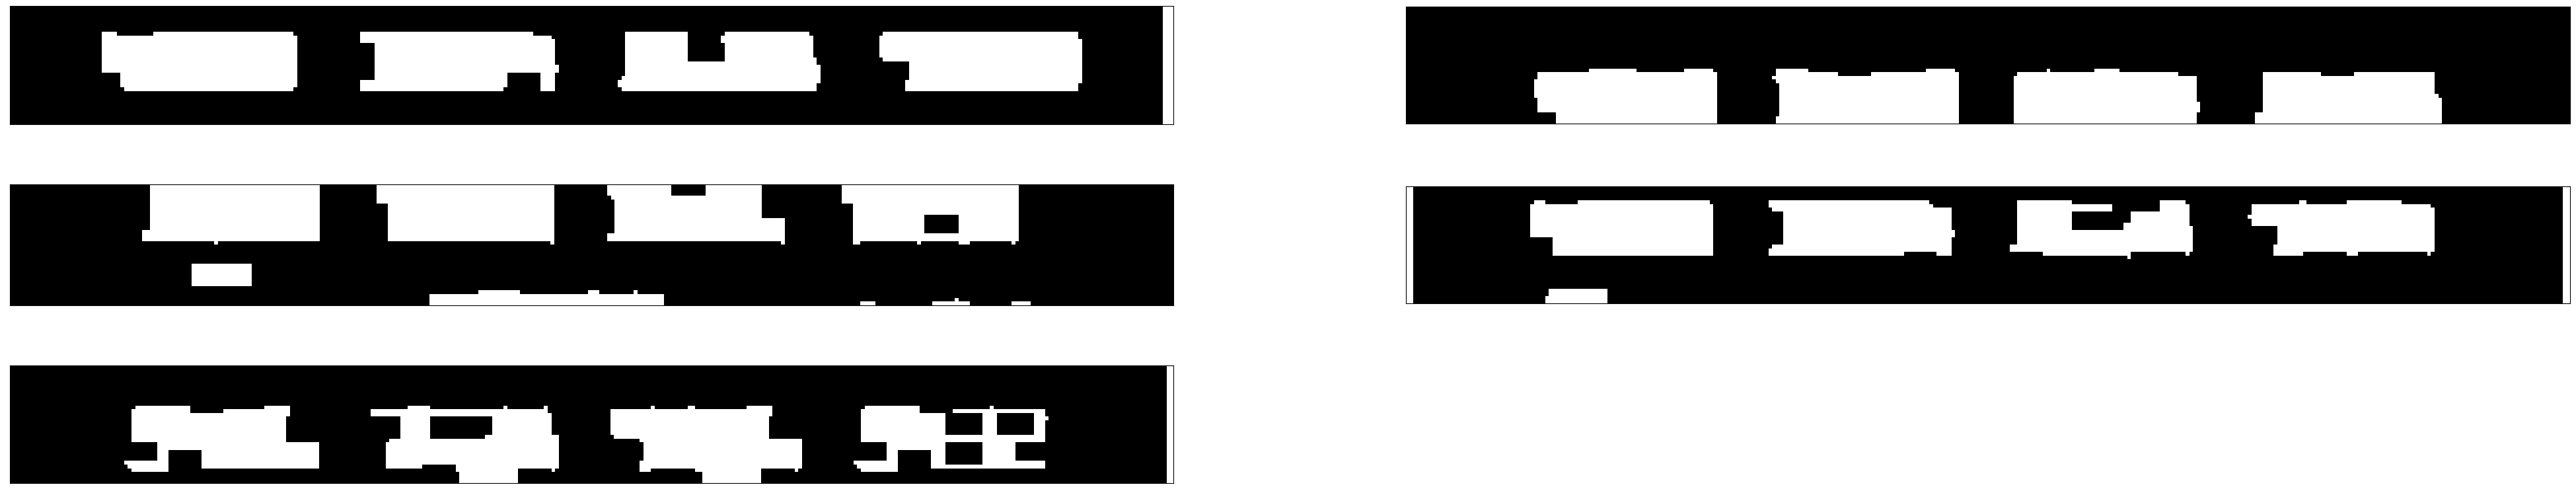

In [19]:
i = 1
plt.figure(figsize=(50, 10))
for name in os.listdir('./images'):
    img = cv2.imread(os.path.join('./images',name), cv2.IMREAD_GRAYSCALE)
    img = img_resize(img, 200)
    h = img.shape[0]
    img = img[h//2:h//3*2]
    rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))
    sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, rectKernel) 
    sobelx = cv2.Sobel(tophat, cv2.CV_64F, 1, 0, ksize=3)
    sobelx = cv2.convertScaleAbs(sobelx)
    minval, maxval = np.min(sobelx), np.max(sobelx)
    sobelx = (255 * ((sobelx - minval) / (maxval - minval)))
    sobelx = sobelx.astype('uint8')
    dilate = cv2.dilate(sobelx, rectKernel, 10)
    erosion = cv2.erode(dilate, rectKernel, 10)
    
    ret, thresh = cv2.threshold(erosion, 0, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
    dilate = cv2.dilate(thresh, sqKernel, 10)
    erosion = cv2.erode(dilate, sqKernel, 10)
    plt.subplot(3, 2, i)
    plt.imshow(erosion, cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    i+=1
        
plt.show()

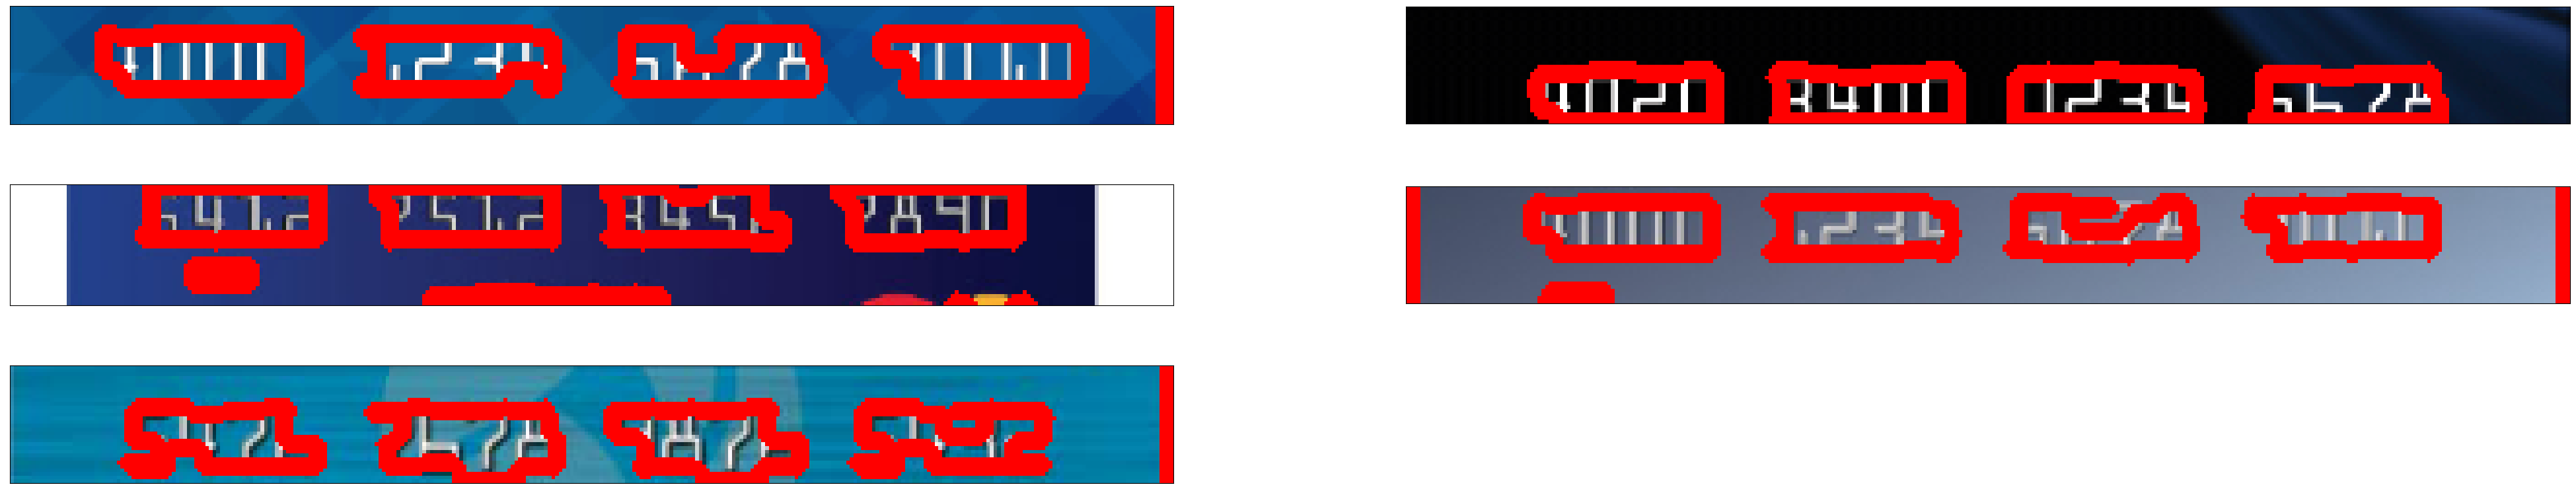

In [20]:
i = 1
plt.figure(figsize=(50, 10))
for name in os.listdir('./images'):
    img = cv2.imread(os.path.join('./images',name))
    img = img_resize(img,200)
    h = img.shape[0]
    img = img[h//2:h//3*2]
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    
    rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))
    sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, rectKernel) 
    sobelx = cv2.Sobel(tophat, cv2.CV_64F, 1, 0, ksize=3)
    sobelx = cv2.convertScaleAbs(sobelx)
    minval, maxval = np.min(sobelx), np.max(sobelx)
    sobelx = (255 * ((sobelx - minval) / (maxval - minval)))
    sobelx = sobelx.astype('uint8')
    dilate = cv2.dilate(sobelx, rectKernel, 10)
    erosion = cv2.erode(dilate, rectKernel, 10)
    
    ret, thresh = cv2.threshold(erosion, 0, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
    dilate = cv2.dilate(thresh, sqKernel, 10)
    erosion = cv2.erode(dilate, sqKernel, 10)
    
    contour, hierarchy = cv2.findContours(erosion, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    res = cv2.drawContours(img.copy(), contour, -1, (0, 0, 255), 3)
    plt.subplot(3, 2, i)
    plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB), cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    i+=1
        
plt.show()

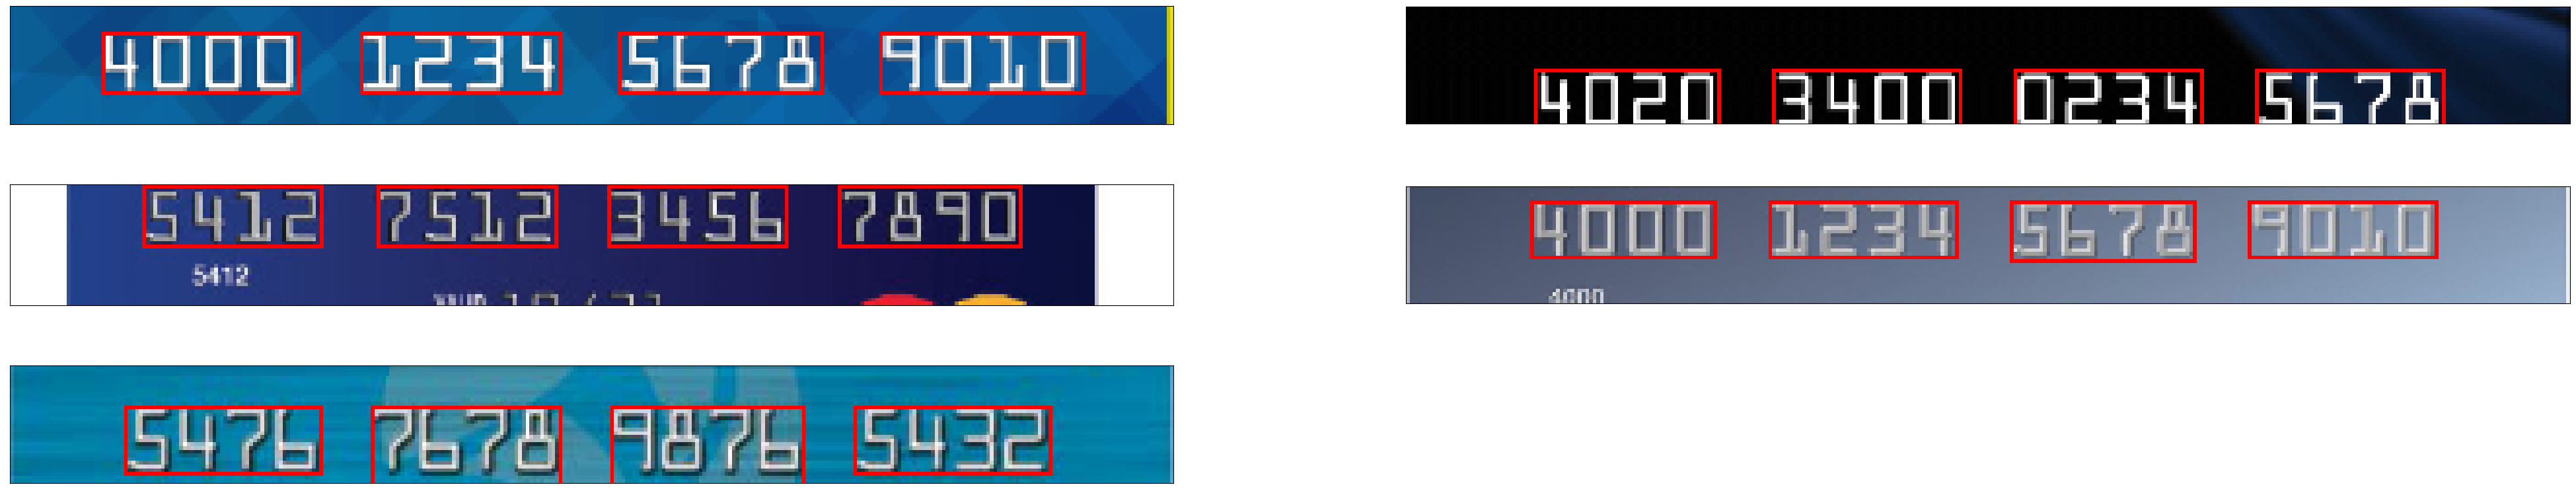

In [21]:
i = 1
k=1
plt.figure(figsize=(50, 10))
for name in os.listdir('./images'):
    img = cv2.imread(os.path.join('./images',name))
    img = img_resize(img, 200)
    h = img.shape[0]
    img = img[h//2:h//3*2]
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    
    rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))
    sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, rectKernel) 
    sobelx = cv2.Sobel(tophat, cv2.CV_64F, 1, 0, ksize=3)
    sobelx = cv2.convertScaleAbs(sobelx)
    minval, maxval = np.min(sobelx), np.max(sobelx)
    sobelx = (255 * ((sobelx - minval) / (maxval - minval)))
    sobelx = sobelx.astype('uint8')
    dilate = cv2.dilate(sobelx, rectKernel, 10)
    erosion = cv2.erode(dilate, rectKernel, 10)
    
    ret, thresh = cv2.threshold(erosion, 0, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
    dilate = cv2.dilate(thresh, sqKernel, 10)
    erosion = cv2.erode(dilate, sqKernel, 10)
    
    contour, hierarchy = cv2.findContours(erosion, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    
    res = img.copy()
    
    for cnt in  contour:
        x, y, w, h = cv2.boundingRect(cnt)
        if w * h > 300:
            res = cv2.rectangle(res, (x, y), (x+w, y+h), (0, 0, 255), 1)
            cv2.imwrite(os.path.join('./cuted_images','{}.jpg'.format(k)), res[y:y+h, x:x+w])
            k+=1
        
    plt.subplot(3, 2, i)
    plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB), cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    i+=1
        
plt.show()

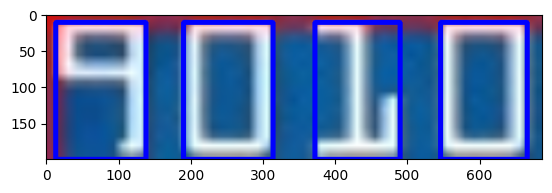

In [22]:
img = cv2.imread('./cuted_images/1.jpg')
img = img_resize(img, 200)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
res = img.copy()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    res = cv2.rectangle(res, (x, y), (x+w, y+h), (255, 0, 0), 5)
    
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.show()

In [23]:
digits = {}
for i in range(10):
    digits[i] = cv2.resize(cv2.imread('./cuted_template/{}.jpg'.format(i)), (100, 150))

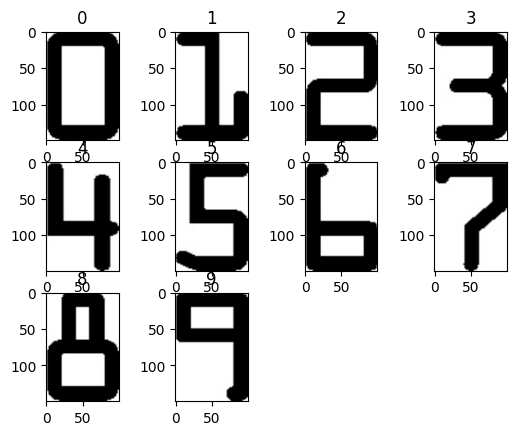

In [24]:
for i in range(10):
    plt.subplot(3, 4, i+1)
    plt.imshow(digits[i])
    plt.title(str(i))

plt.show()

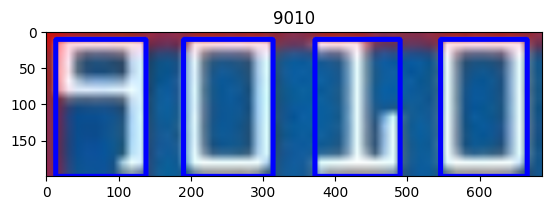

In [25]:
img = cv2.imread('./cuted_images/1.jpg')
img = img_resize(img, 200)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

number = ""

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cur_img = res[y:y+h, x:x+w].copy()
    cur_img = cv2.resize(cur_img, (100, 150))
    scores = []
    for i in range(10):
        result = cv2.matchTemplate(cur_img, digits[i], cv2.TM_CCOEFF)
        (_, score, _, _) = cv2.minMaxLoc(result)
       
        scores.append(score)   
    number = str(np.argmin(scores))+number
    
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.title(number)
plt.show()